<a href="https://colab.research.google.com/github/Archalharin/229352-stat-for-data-science/blob/main/Lab05_decision_tree_bagging_RF_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [3]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:

# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [5]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [6]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

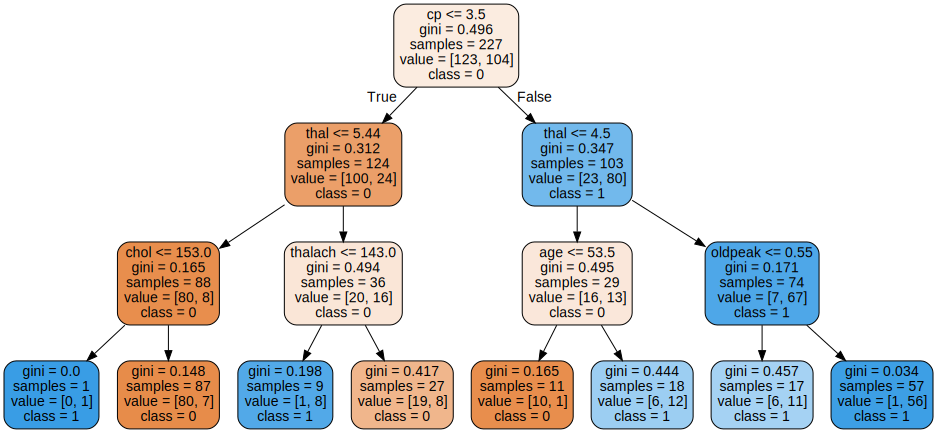

In [7]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [8]:
from sklearn.metrics import classification_report

ypred = gridcv.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72        41
           1       0.67      0.69      0.68        35

    accuracy                           0.70        76
   macro avg       0.70      0.70      0.70        76
weighted avg       0.70      0.70      0.70        76



## Bagged decision trees
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))

In [9]:
clf = DecisionTreeClassifier()

bagged_trees = BaggingClassifier(clf, n_estimators=100, max_samples=X_train.shape[0], max_features=5)

bagged_trees.fit(X_train, y_train)

ypred = bagged_trees.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79        41
           1       0.77      0.69      0.73        35

    accuracy                           0.76        76
   macro avg       0.76      0.76      0.76        76
weighted avg       0.76      0.76      0.76        76



## Random forest classifier
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))

In [10]:
rf = RandomForestClassifier(n_estimators=200)

rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200)

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

In [11]:
# Define model
clf = DecisionTreeClassifier()
clf_1 = DecisionTreeClassifier()
bagged_tree = BaggingClassifier(clf, n_estimators=100, max_samples=X_train.shape[0], max_features=5)
rf = RandomForestClassifier()

In [17]:
# Pipeline
pipe_dt = Pipeline([
    ("model_dt", clf)
])

pipe_bt = Pipeline([
    ("model_bt", bagged_tree)
])

pipe_rf = Pipeline([
    ("model_rf", rf)
])

In [18]:
# Parameters
param_dt = {
    "model_dt__criterion": ['gini', 'entropy', 'log_loss'],
    "model_dt__min_samples_leaf": [1, 3, 5, 7],
    "model_dt__max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

param_bt = {
    "model_bt__n_estimators": [10, 50, 100,],
    "model_bt__max_samples": [0.6, 0.8, 1.0],
    "model_bt__max_features": [5, 10]
}

param_rf = {
    "model_rf__n_estimators": [10, 50, 100,],
    "model_rf__max_depth": [1, 3, 5, 7, 9],
    "model_rf__min_samples_split": [2, 3, 4]
}

In [19]:
# Grid search decision tree
grid_dt = GridSearchCV(
    pipe_dt,
    param_dt,
    cv=5,
    scoring="f1_macro"
)

grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model_dt', DecisionTreeClassifier())]),
             param_grid={'model_dt__criterion': ['gini', 'entropy', 'log_loss'],
                         'model_dt__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'model_dt__min_samples_leaf': [1, 3, 5, 7]},
             scoring='f1_macro')

In [20]:
ypred =grid_dt.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        41
           1       0.69      0.69      0.69        35

    accuracy                           0.71        76
   macro avg       0.71      0.71      0.71        76
weighted avg       0.71      0.71      0.71        76



In [21]:
# Grid search bagged-decision tree
grid_bt = GridSearchCV(
    pipe_bt,
    param_bt,
    cv=5,
    scoring="f1_macro"
)

grid_bt.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model_bt',
                                        BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                          max_features=5,
                                                          max_samples=227,
                                                          n_estimators=100))]),
             param_grid={'model_bt__max_features': [5, 10],
                         'model_bt__max_samples': [0.6, 0.8, 1.0],
                         'model_bt__n_estimators': [10, 50, 100]},
             scoring='f1_macro')

In [22]:
ypred =grid_bt.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.74      0.85      0.80        41
           1       0.79      0.66      0.72        35

    accuracy                           0.76        76
   macro avg       0.77      0.76      0.76        76
weighted avg       0.77      0.76      0.76        76



In [23]:
# Grid search random forest
grid_rf = GridSearchCV(
    pipe_rf,
    param_rf,
    cv=5,
    scoring="f1_macro"
)

grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model_rf', RandomForestClassifier())]),
             param_grid={'model_rf__max_depth': [1, 3, 5, 7, 9],
                         'model_rf__min_samples_split': [2, 3, 4],
                         'model_rf__n_estimators': [10, 50, 100]},
             scoring='f1_macro')

In [24]:
ypred =grid_rf.predict(X_test)

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.88        41
           1       0.93      0.74      0.83        35

    accuracy                           0.86        76
   macro avg       0.87      0.85      0.85        76
weighted avg       0.87      0.86      0.85        76



Accuracy and F1 score for each model

Decision tree: Acc = 0.71, F1 = 0.71

bagged Decision tree: Acc = 0.76, F1 = 0.76

Random forest: Acc = 0.86, F1 = 0.85



best model: RandomForestClassifier(max_depth=3, min_samples_split=3)
hyperparameters: \
decision tree : criterion(เกณฑ์ที่ใช่แบ่ง Node ของต้นไม้) max_depth(ความลึกสูงสุดที่ต้นไม้สามารถมีได้หรือจำนวนกิ่งจากรากถึงใบสุดท้าย) min_samples_leaf(จำนวนข้อมูลขั้นต่ำในใบไม้แต่ละใบ) \
bagged-decision tree : n_estimators(จำนวนโมเดลย่อยที่ใช้ในการ bagging) max_samples (สัดส่วนข้อมูลที่ใช้ต่อต้นไม้หนึ่งต้น) max_features(แต่ละต้นไม้จะใช้ feature กี่ตัวจากชุดข้อมูล)\
random forest : n_estimators(จำนวน Decision Trees ที่ใช้ใน Random Forest) max_depth(ความลึกสูงสุดของต้นไม้แต่ละต้น) min_samples_split(จำนวนข้อมูลขั้นต่ำที่ Node ต้องมีเพื่อแตกกิ่งออก)

The best values of your hyperparameters : \
decision tree : DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5) \
bagged-decision tree : n_estimators(default = 10) max_samples (default = None) max_features(default = 1)

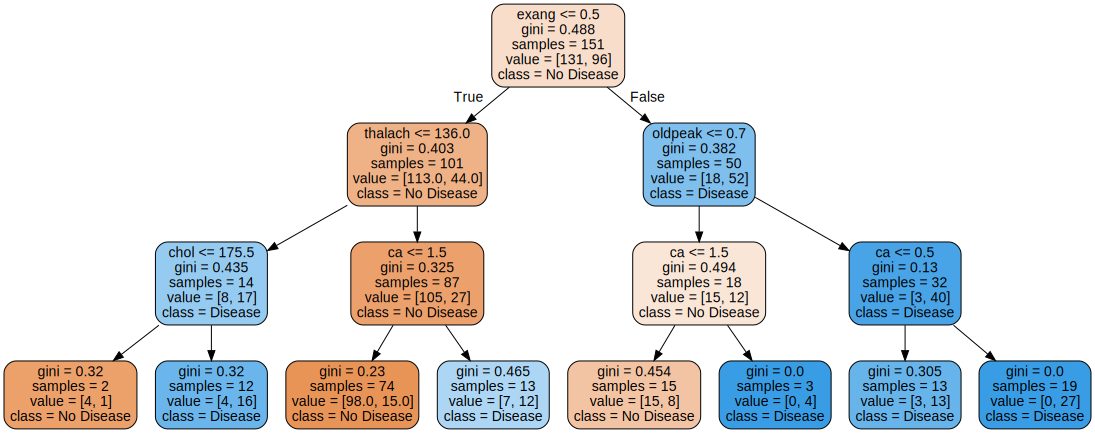

In [25]:
rf_best = grid_rf.best_estimator_
rf_model = rf_best.named_steps["model_rf"]

best_tree = rf_model.estimators_[0]

dot_data = export_graphviz(
    best_tree,
    out_file=None,
    feature_names=X.columns,
    class_names=["No Disease", "Disease"],
    filled=True,
    rounded=True
)

graphviz.Source(dot_data)